In [1]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from statistics import mean 


#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_change(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        last_gw = ""
        cnt = 0
        for index, row in gw_data.iterrows():
            if last_gw != row['gateway']:
                last_gw = row['gateway']
                cnt+=1
        sum_change +=cnt
    return sum_change/len(dirs)


# Static gateway changes reading

In [ ]:
INPUT_DIR = os.path.join("wired/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wiredGreedy=  mean(numbers)

INPUT_DIR = os.path.join("wired/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wiredPower2 = mean(numbers)

INPUT_DIR = os.path.join("wired/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
wiredRandom = mean(numbers)

# Wireless static gateway changes reading

In [ ]:



INPUT_DIR = os.path.join("wireless/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wirelessGreedy=  mean(numbers)

INPUT_DIR = os.path.join("wireless/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
wirelessPower2 = mean(numbers)

INPUT_DIR = os.path.join("wireless/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
wirelessRandom = mean(numbers)




# Mobility gateway changes reading

In [41]:

INPUT_DIR = os.path.join("mobility/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
mobilityGreedy=  mean(numbers)

INPUT_DIR = os.path.join("mobility/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
    
mobilityPower2 = mean(numbers)

INPUT_DIR = os.path.join("mobility/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = []
for path in dirs:
    numbers.append(read_gateway_change(os.path.join(INPUT_DIR, path+"/gwChange")))
mobilityRandom = mean(numbers)

# Plots for the number of gateway changes for 100 rounds of measurement round

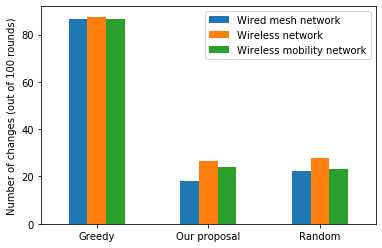

In [4]:

df = pd.DataFrame({'Wired mesh network':{'Greedy':wiredGreedy, 
                               'Our proposal':wiredPower2, 
                                   'Random':wiredRandom},
    'Wireless network':{'Greedy':wirelessGreedy, 
                               'Our proposal':wirelessPower2, 
                                   'Random':wirelessRandom},
    'Wireless mobility network':{'Greedy':mobilityGreedy, 
                               'Our proposal':mobilityPower2, 
                                   'Random':mobilityRandom}})
df.plot.bar(rot=360)
plt.ylabel("Number of changes (out of 100 rounds)")
plt.show()

In [53]:
import warnings
warnings.filterwarnings('ignore')

headers = ['time', 'gateway']
def read_clients_per_gateway(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        data = data.append(gw_data)
        
    data = data.sort_index()
    groupDf = pd.DataFrame(columns=["time","gateway","users"])
    return data.groupby([pd.TimeGrouper(freq='2Min'), data['gateway']]).count().unstack().mean()

INPUT_DIR = os.path.join("wired/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

wiredGreedy = numbers.groupby(numbers.index).mean()

INPUT_DIR = os.path.join("wired/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wiredPower2 = numbers.groupby(numbers.index).mean()

INPUT_DIR = os.path.join("wired/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wiredRandom = numbers.groupby(numbers.index).mean()




INPUT_DIR = os.path.join("wireless/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

wirelessGreedy = numbers.groupby(numbers.index).mean()

INPUT_DIR = os.path.join("wireless/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wirelessPower2 = numbers.groupby(numbers.index).mean()

INPUT_DIR = os.path.join("wireless/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
wirelessRandom = numbers.groupby(numbers.index).mean()


INPUT_DIR = os.path.join("mobility/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)

mobilityGreedy = numbers.groupby(numbers.index).mean()

INPUT_DIR = os.path.join("mobility/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
mobilityPower2 = numbers.groupby(numbers.index).mean()

INPUT_DIR = os.path.join("mobility/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
numbers = pd.Series()
for path in dirs:
    temp = read_clients_per_gateway(os.path.join(INPUT_DIR, path+"/gwChange"))
    numbers= numbers.append(temp)
mobilityRandom = numbers.groupby(numbers.index).mean()


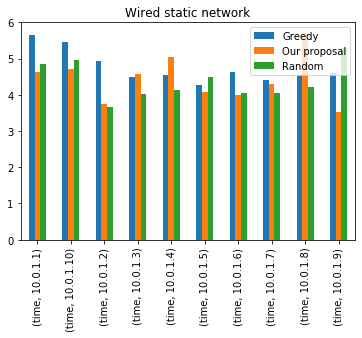

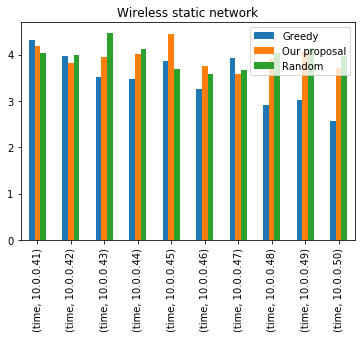

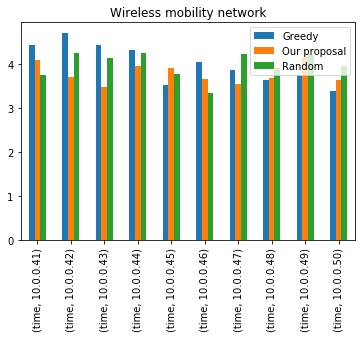

In [55]:
df = pd.DataFrame({'Greedy': wiredGreedy,
'Our proposal':wiredPower2,
'Random':wiredRandom})
df.plot.bar()
plt.title('Wired static network')
plt.show()

df = pd.DataFrame({'Greedy':wirelessGreedy, 
                               'Our proposal':wirelessPower2, 
                                   'Random':wirelessRandom})
df.plot.bar()
plt.title('Wireless static network')
plt.show()


df = pd.DataFrame({'Greedy':mobilityGreedy, 
                               'Our proposal':mobilityPower2, 
                                   'Random':mobilityRandom})
df.plot.bar()
plt.title('Wireless mobility network')
plt.show()

#df.plot.bar(rot=360)
#plt.ylabel("Number of changes (out of 100 rounds)")
#plt.show()

In [29]:
#EXP_NAME = "tolerance/15"
headers = ['time', 'gateway']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_users(dir_name, title, fr):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(50)
        data = data.append(gw_data)
    
    data = data.sort_index()
    groupDf = pd.DataFrame(columns=["time","gateway","users"])
    data.groupby([pd.TimeGrouper(freq=fr), data['gateway']]).count().unstack().iloc[20:25].plot.bar(rot=45)
    #for name, group in data.groupby([pd.TimeGrouper(freq='2min'), data['gateway']]):
    #    groupDf = groupDf.append({"time":name[0],"gateway":name[1], "users":len(group)}, ignore_index=True)
    
    #groupDf = groupDf.set_index(pd.DatetimeIndex(groupDf['time']))
    #groupDf = groupDf.sort_index()
    #print(groupDf.head(10))
    #groupDf[['gateway','users']].head(10).plot.bar(rot=45, y = ['user'], x='gateway')
    plt.legend(['g1','g2','g3','g4','g5','g6','g7','g8','g9','g10'],loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.title(title)
    plt.show()
    #for every gateway, find the avg load
    #for name, group in (groupDf.groupby(['gateway'])):
    #    print(name, group['users'])
        

        
read_gateway_users("wirelessMobility/greedy/gwChange", 'Wireless mobility greedy', '2Min')
read_gateway_users("wirelessMobility/power2/gwChange", 'Wireless mobility our proposal', '2Min')
read_gateway_users("wirelessMobility/random/gwChange", 'Wireless mobility random', '2Min')


read_gateway_users("wireless/40nodes/greedy/gwChange", 'Wireless greedy', '2Min')
read_gateway_users("wireless/40nodes/power2/gwChange", 'Wireless our proposal', '2Min')
read_gateway_users("wireless/40nodes/random/gwChange", 'Wireless random', '2Min')

read_gateway_users("wired/best/gwChange", 'Wired greedy', '2Min')
read_gateway_users("wired/power2/gwChange", 'Wired our proposal', '2Min')
read_gateway_users("wired/random/gwChange", 'Wired random', '2Min')

FileNotFoundError: [Errno 2] No such file or directory: '/home/khulan/mn/selectionLayer/wirelessMobility/greedy/gwChange'

In [6]:
#EXP_NAME = "tolerance/15"
headers = ['time', 'latency']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_users(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        data = data.append(gw_data)
    
    data = data.sort_index()
    return data.groupby([pd.TimeGrouper(freq='1min')]).mean()

def getECDF(df, attr):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[attr].value_counts()
    ecdf = df.sort_index().cumsum()*1./df.sum()    
    return ecdf

#fig, ax = plt.subplots()

#getECDF(read_gateway_users("wiredR/power2/download")).plot(ax=ax, rot=45)
#getECDF(read_gateway_users("wiredR/random/download")).plot(ax=ax, rot=45)
#plt.legend(['Our selection','random'])
#plt.ylabel('ECDF')
#plt.xlabel('Download time (ms)')
#plt.title('Wired network')
#plt.xlim(0,20)
#plt.show()

#fig, ax = plt.subplots()
#getECDF(read_gateway_users("wireless/40nodes/greedy/download")).plot(ax = ax, rot=45)
#getECDF(read_gateway_users("wireless/40nodes/power2/download")).plot(ax=ax, rot=45)
#getECDF(read_gateway_users("wireless/40nodes/random/download")).plot(ax=ax, rot=45)
#plt.legend(['Greedy','Our selection','Random'])
#plt.ylabel('ECDF')
#plt.xlabel('Download time (ms)')
#plt.title('Wireless network')
#plt.xlim(0,20)
#plt.show()

#fig, ax = plt.subplots()
#getECDF(read_gateway_users("wirelessMobility/greedy/download")).plot(ax = ax, rot=45)
#getECDF(read_gateway_users("wirelessMobility/power2/download")).plot(ax=ax, rot=45)
#getECDF(read_gateway_users("wirelessMobility/random/download")).plot(ax=ax, rot=45)
#plt.legend(['Greedy','Our selection','Random'])
#plt.ylabel('ECDF')
#plt.xlabel('Download time (ms)')
#plt.title('Wireless mobility network')
#plt.xlim(0,20)
#plt.show()

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please

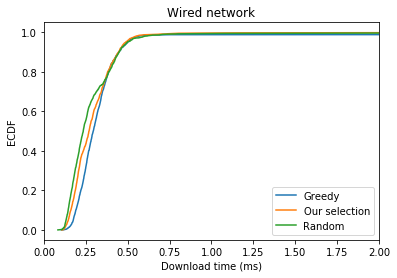

In [8]:

INPUT_DIR = os.path.join("wired/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

fig, ax = plt.subplots()
getECDF(numbers,'latency').plot()


INPUT_DIR = os.path.join("wired/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)


INPUT_DIR = os.path.join("wired/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

getECDF(numbers,'latency').plot(ax=ax)
plt.legend(['Greedy','Our selection','Random'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.title('Wired network')
plt.xlim(0,2)
plt.show()
    


/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please

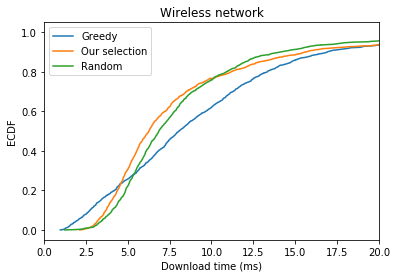

In [9]:
INPUT_DIR = os.path.join("wireless/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

fig, ax = plt.subplots()
getECDF(numbers,'latency').plot()


INPUT_DIR = os.path.join("wireless/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers, 'latency').plot(ax=ax)


INPUT_DIR = os.path.join("wireless/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

getECDF(numbers, 'latency').plot(ax=ax)
plt.legend(['Greedy','Our selection','Random'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.title('Wireless network')
plt.xlim(0,20)
plt.show()
    

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please

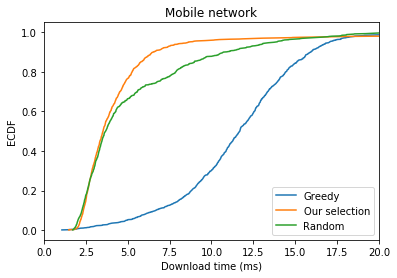

In [10]:
INPUT_DIR = os.path.join("mobility/greedy/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

fig, ax = plt.subplots()
getECDF(numbers,'latency').plot()


INPUT_DIR = os.path.join("mobility/power2/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))
getECDF(numbers,'latency').plot(ax=ax)


INPUT_DIR = os.path.join("mobility/random/")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]

numbers = pd.DataFrame()
for path in dirs:
    numbers = numbers.append(read_gateway_users(os.path.join(INPUT_DIR, path+"/download")))

getECDF(numbers,'latency').plot(ax=ax)
plt.legend(['Greedy','Our selection','Random'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.title('Mobile network')
plt.xlim(0,20)
plt.show()
    

# Finding the effect of density affects to the download time

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


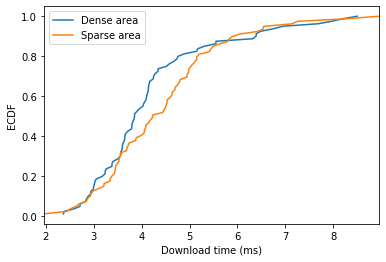

In [11]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
from statistics import mean 


INPUT_DIR = os.path.join("sparse/download/dense")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
dense =  read_gateway_users(os.path.join(INPUT_DIR))
ax = getECDF(dense, 'latency').plot()



INPUT_DIR = os.path.join("sparse/download/sparse")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
sparse =  read_gateway_users(os.path.join(INPUT_DIR))

getECDF(sparse,'latency').plot(ax=ax)
plt.legend(['Dense area','Sparse area'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.show()

In [12]:
#EXP_NAME = "tolerance/15"
headers = ['time', 'candidates']

#Read input files from the directory and returns DataTable object in a combined list
def read_gateway_candidates(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        data = data.append(gw_data)
    
    data = data.sort_index()
    return data.groupby([pd.TimeGrouper(freq='2min')]).mean()


# Number of available candidates sparse vs dense area

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


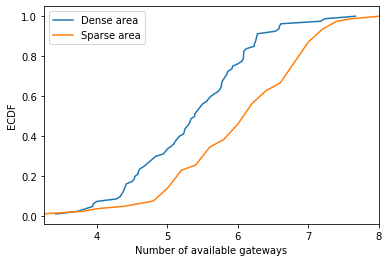

In [13]:

INPUT_DIR = os.path.join("sparse/candidates/dense")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
dense =  read_gateway_users(os.path.join(INPUT_DIR))
ax = getECDF(dense, 'candidates').plot()



INPUT_DIR = os.path.join("sparse/candidates/sparse")
dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]
sparse =  read_gateway_users(os.path.join(INPUT_DIR))

getECDF(sparse, 'candidates').plot(ax=ax)

plt.legend(['Dense area','Sparse area'])
plt.ylabel('ECDF')
plt.xlabel('Number of available gateways')
plt.show()

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


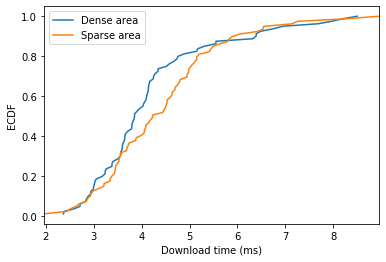

In [60]:

ax = getECDF(read_gateway_users(os.path.join('sparse/download/dense')),'latency').plot()
getECDF(read_gateway_users(os.path.join("sparse/download/sparse")),'latency').plot(ax=ax)
plt.legend(['Dense area','Sparse area'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.show()

# Number of selection choices D=[1,2,3,4]

/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


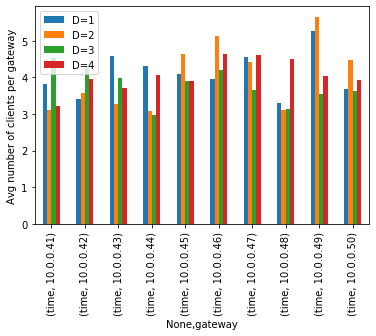

In [63]:
headers = ['time', 'gateway']
def read_clients_per_gateway(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        data = data.append(gw_data)
        
    data = data.sort_index()
    groupDf = pd.DataFrame(columns=["time","gateway","users"])
    return data.groupby([pd.TimeGrouper(freq='2Min'), data['gateway']]).count().unstack().mean()
    

df = pd.DataFrame({'D=1':read_clients_per_gateway('multiD/1/gwChange'),
                   'D=2':read_clients_per_gateway('multiD/2/gwChange'),
                  'D=3':read_clients_per_gateway('multiD/3/gwChange'),
                  'D=4':read_clients_per_gateway('multiD/4/gwChange')})
df.plot.bar(rot=90)
plt.ylabel('Avg number of clients per gateway')
plt.show()
        


/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


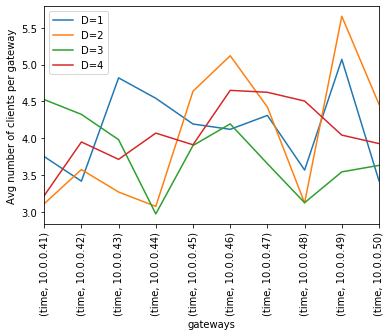

In [48]:
headers = ['time', 'gateway']
def read_clients_per_gateway(dir_name):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join(os.getcwd(), dir_name)
    data = pd.DataFrame()
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR))]    
    
    sum_change = 0
    for client in dirs:
        gw_data = pd.read_csv(os.path.join(INPUT_DIR, client), sep=',')
        gw_data.columns= headers
        gw_data = gw_data.set_index(pd.DatetimeIndex(gw_data['time']))
        gw_data = gw_data.head(100)
        data = data.append(gw_data)
        
    data = data.sort_index()
    groupDf = pd.DataFrame(columns=["time","gateway","users"])
    data.groupby([pd.TimeGrouper(freq='2Min'), data['gateway']]).count().unstack().mean().plot(rot=90)
    



read_clients_per_gateway('multiD/1/gwChange')
read_clients_per_gateway('multiD/2/gwChange')
read_clients_per_gateway('multiD/3/gwChange')
read_clients_per_gateway('multiD/4/gwChange')
plt.legend(['D=1', 'D=2','D=3','D=4'])
plt.xlabel('gateways')
plt.ylabel('Avg number of clients per gateway')
plt.show()



/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
/home/khulan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)


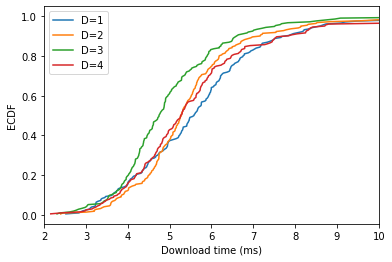

In [62]:
headers = ['time', 'latency']
fig, ax = plt.subplots()
ax = getECDF(read_gateway_users(os.path.join("multiD/1/download")),'latency').plot()

getECDF(read_gateway_users(os.path.join("multiD/2/download")),'latency').plot(ax=ax)
getECDF(read_gateway_users(os.path.join("multiD/3/download")),'latency').plot(ax=ax)
getECDF(read_gateway_users(os.path.join("multiD/4/download")),'latency').plot(ax=ax)

plt.legend(['D=1','D=2','D=3','D=4'])
plt.ylabel('ECDF')
plt.xlabel('Download time (ms)')
plt.xlim(2, 10)
plt.show()
    